In [1]:
import matplotlib.pyplot as plt
a = [1, 2, 2]
b = [1, 3, 5]
plt.plot(b, a)
plt.show()

<Figure size 640x480 with 1 Axes>

- Concat: 데이터를 여러개 읽어서 스텍으로 쌓는 방법을 제시함.

In [3]:
import pandas as pd
Concat_data = pd.read_csv('./data/concat_data.csv')
print(Concat_data)

   name  age  Hb1  Hb2
0     1    2    3    4
1     5    6    7    8
2     9   10   11   12
3    13   14   15   16


In [4]:
total_data = []
for _ in range(0, 2):
    temp_data = pd.read_csv('./data/concat_data.csv')
    total_data.append(temp_data)
out = pd.concat(total_data, ignore_index=True)

In [5]:
out

,name,age,Hb1,Hb2
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12
3,13,14,15,16
4,1,2,3,4
5,5,6,7,8
6,9,10,11,12
7,13,14,15,16


# ESREL 2019
## 1. ESREL 2019 Duration 그래프 그리기

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import time
Duration = pd.read_csv('./data/run_.-tag-Duration_Episode.csv')
Duration[0:5]

,Wall time,Step,Value
0,1546135585,7,46
1,1546135621,20,51
2,1546135631,26,61
3,1546135689,42,46
4,1546135693,44,46


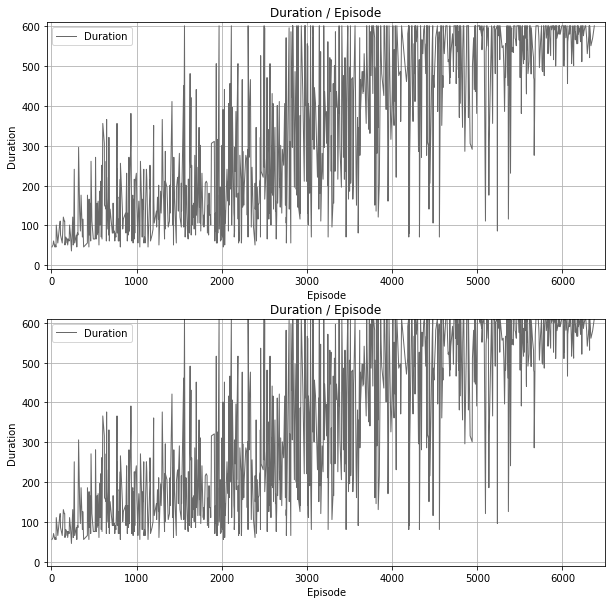

In [10]:
%matplotlib inline

def ESREL_2019(x, y, title = None, color = None, lable = None, file_name = None, x_lab = None, y_lab = None, x_range = None, y_range = None, fig_size = None):
    fig = plt.figure(figsize=fig_size)
    ax = []
    for _ in range(1, len(y)+1):
        ax.append(fig.add_subplot(len(y), 1, _))
        
    for axis in range(0, len(ax)):
        ax[axis].plot(x, y[axis], color=color, linewidth=1, label=lable)
            
        ax[axis].set_title(title)
        if x_range != None:
            ax[axis].set_xlim(x_range[0], x_range[1])
        if y_range != None:
            ax[axis].set_ylim(y_range[0], y_range[1])
    
        ax[axis].set_xlabel(x_lab)
        ax[axis].set_ylabel(y_lab)
        ax[axis].legend()
        ax[axis].grid()
    
    if file_name != None:
        now = time.localtime()
        plt.savefig('./graph/{}_{}_{}_{}.png'.format(file_name, now.tm_mday, now.tm_hour, now.tm_min), dpi=600)
    plt.show()
    

ESREL_2019(Duration['Step'], [Duration['Value'], Duration['Value']+10], fig_size=(10, 10),
           title='Duration / Episode', x_lab='Episode', y_lab='Duration',
           lable='Duration', color='dimgray', x_range=[-50, 6500], y_range=[-10, 610]) #, file_name='Dur')

## 2. Average max probaility 그리기

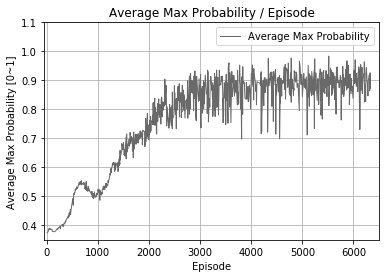

In [11]:
AMP = pd.read_csv('./data/run_.-tag-Average_Max_Prob_Episode.csv')
ESREL_2019(AMP['Step'], [AMP['Value']*1.12],
           title='Average Max Probability / Episode', x_lab='Episode', y_lab='Average Max Probability [0~1]',
           lable='Average Max Probability', color='dimgray', x_range=[-50, 6500], y_range=[0.35, 1.1]) #, file_name='Amp')

## 3. 분당 1% 증가 그리기

In [12]:
Min_1_increase = pd.read_csv('./data/Control_history_6304_Thread-45.csv')
Min_1_increase[0:5]

,Time,Reward,Control,Power,Up_con,Down_con,Stad_con,Turbin,EO
0,0,1,1,0.021388,0.102117,0.097883,0.0216,0.0,0
1,1,1,0,0.021479,0.103209,0.096791,0.0218,0.0,0
2,2,1,0,0.021567,0.104330,0.095670,0.0220,0.0,0
3,3,1,0,0.021653,0.105473,0.094527,0.0222,0.0,0
4,4,1,0,0.021736,0.106641,0.093359,0.0224,0.0,0


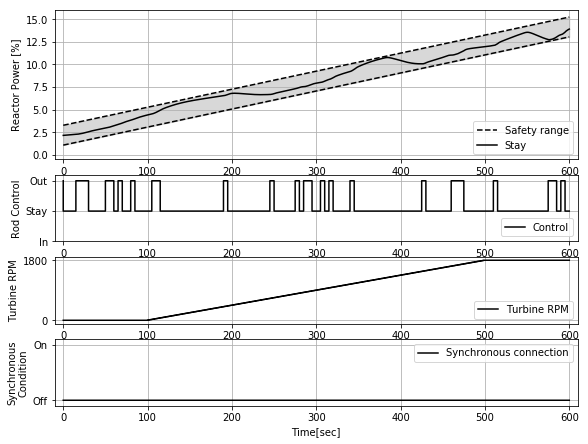

In [13]:
Pa = {
    'figsize': (8, 6), 'title': '', 
    'x':  Min_1_increase['Time'], 'x_range': [-10, 610], 'y_range': [-0.5, 16], 'x_lab': 'Time[sec]', 'y_lab': 'Reactor Power [%]',
    'y_1': (Min_1_increase['Stad_con']*100) + 1.1, 'y_2': (Min_1_increase['Stad_con']*100) - 1.1, 'y_3': Min_1_increase['Power'] * 100,
    'l_1': 'Up', 'l_2': 'Safety range', 'l_3': 'Stay',
    'c_1': 'black', 'c_2': 'black', 'c_3': 'black',
    'f_name': 'min_1_indrease'
}


fig = plt.figure(figsize=Pa['figsize'], linewidth=2.5)
ax = []
gs = fig.add_gridspec(5, 1)
ax.append(fig.add_subplot(gs[0:2, :]))
ax.append(fig.add_subplot(gs[2:3, :]))
ax.append(fig.add_subplot(gs[3:4, :]))
ax.append(fig.add_subplot(gs[4:5, :]))
    
##========================================================================================================
axis = 0 
ax[axis].plot(Pa['x'], Pa['y_1'], color=Pa['c_1'], linewidth=1.5, label='', linestyle='dashed')
ax[axis].plot(Pa['x'], Pa['y_2'], color=Pa['c_2'], linewidth=1.5, label=Pa['l_2'], linestyle='dashed')
ax[axis].plot(Pa['x'], Pa['y_3'], color=Pa['c_3'], linewidth=1.5, label=Pa['l_3'])
ax[axis].fill_between(Pa['x'], Pa['y_1'], Pa['y_2'], alpha=0.3, color='gray')
ax[axis].set_title(Pa['title'])
if Pa['x_range'] != None:
    ax[axis].set_xlim(Pa['x_range'][0], Pa['x_range'][1])
if Pa['y_range'] != None:
    ax[axis].set_ylim(Pa['y_range'][0], Pa['y_range'][1])

# ax[axis].set_xlabel(Pa['x_lab'])
ax[axis].set_ylabel(Pa['y_lab'])
ax[axis].legend(loc=4)
ax[axis].grid()
##========================================================================================================
axis = 1
ax[axis].step(Pa['x'], Min_1_increase['Control'], color='black', linewidth=1.5, label='Control')

if Pa['x_range'] != None:
    ax[axis].set_xlim(Pa['x_range'][0], Pa['x_range'][1])
if Pa['y_range'] != None:
    ax[axis].set_ylim(0-0.2, 1+0.2)
ax[axis].set_yticks((-1, 0, 1))
ax[axis].set_yticklabels(('In', 'Stay', 'Out'))
# ax[axis].set_xlabel(Pa['x_lab'])
ax[axis].set_ylabel('Rod Control')
ax[axis].legend(loc=4)
ax[axis].grid()
##========================================================================================================
axis = 2
ax[axis].step(Pa['x'], Min_1_increase['Turbin'], color='black', linewidth=1.5, label='Turbine RPM')

if Pa['x_range'] != None:
    ax[axis].set_xlim(Pa['x_range'][0], Pa['x_range'][1])
if Pa['y_range'] != None:
    ax[axis].set_ylim(0 - 100, 1800 + 100)
ax[axis].set_yticks((0, 1800))
ax[axis].set_yticklabels(('0', '1800'))
# ax[axis].set_xlabel(Pa['x_lab'])
ax[axis].set_ylabel('Turbine RPM')
ax[axis].legend(loc=4)
ax[axis].grid()
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=-1)
##========================================================================================================
axis = 3
ax[axis].step(Pa['x'], Min_1_increase['EO'], color='black', linewidth=1.5, label='Synchronous connection')

if Pa['x_range'] != None:
    ax[axis].set_xlim(Pa['x_range'][0], Pa['x_range'][1])
if Pa['y_range'] != None:
    ax[axis].set_ylim(0 - 0.1, 1 + 0.1)
ax[axis].set_yticks((0, 1))
ax[axis].set_yticklabels(('Off', 'On'))
ax[axis].set_xlabel(Pa['x_lab'])
ax[axis].set_ylabel('Synchronous\nCondition')
ax[axis].legend(loc=0)
ax[axis].grid()
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=-0.5)
##========================================================================================================
if Pa['f_name'] != None:
    now = time.localtime()
    # plt.savefig('./graph/{}_{}_{}_{}.png'.format(Pa['f_name'], now.tm_mday, now.tm_hour, now.tm_min), dpi=600)
    plt.savefig('./graph/{}.png'.format(Pa['f_name']), dpi=600)
plt.show()

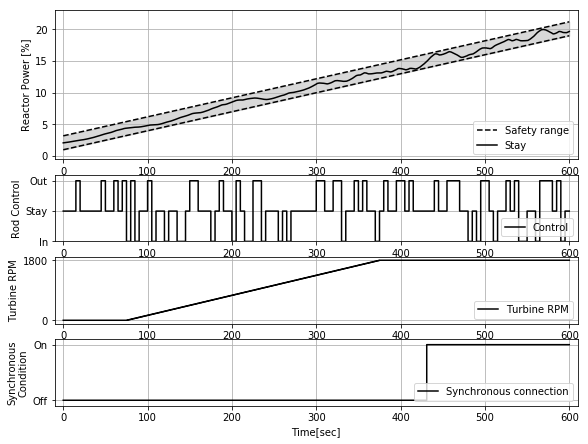

In [14]:
Min_1_increase = pd.read_csv('./data/Control_history_7032_Thread-52.csv')
Min_1_increase[0:5]
Pa = {
    'figsize': (8, 6), 'title': '', 
    'x':  Min_1_increase['Time'], 'x_range': [-10, 610], 'y_range': [-0.5, 23], 'x_lab': 'Time[sec]', 'y_lab': 'Reactor Power [%]',
    'y_1': (Min_1_increase['Stad_con']*100) + 1.1, 'y_2': (Min_1_increase['Stad_con']*100) - 1.1, 'y_3': Min_1_increase['Power'] * 100,
    'l_1': 'Up', 'l_2': 'Safety range', 'l_3': 'Stay',
    'c_1': 'black', 'c_2': 'black', 'c_3': 'black',
    'f_name': 'min_1_5_indrease'
}


fig = plt.figure(figsize=Pa['figsize'], linewidth=2.5)
ax = []
gs = fig.add_gridspec(5, 1)
ax.append(fig.add_subplot(gs[0:2, :]))
ax.append(fig.add_subplot(gs[2:3, :]))
ax.append(fig.add_subplot(gs[3:4, :]))
ax.append(fig.add_subplot(gs[4:5, :]))
    
##========================================================================================================
axis = 0 
ax[axis].plot(Pa['x'], Pa['y_1'], color=Pa['c_1'], linewidth=1.5, label='', linestyle='dashed')
ax[axis].plot(Pa['x'], Pa['y_2'], color=Pa['c_2'], linewidth=1.5, label=Pa['l_2'], linestyle='dashed')
ax[axis].plot(Pa['x'], Pa['y_3'], color=Pa['c_3'], linewidth=1.5, label=Pa['l_3'])
ax[axis].fill_between(Pa['x'], Pa['y_1'], Pa['y_2'], alpha=0.3, color='gray')
ax[axis].set_title(Pa['title'])
if Pa['x_range'] != None:
    ax[axis].set_xlim(Pa['x_range'][0], Pa['x_range'][1])
if Pa['y_range'] != None:
    ax[axis].set_ylim(Pa['y_range'][0], Pa['y_range'][1])

# ax[axis].set_xlabel(Pa['x_lab'])
ax[axis].set_ylabel(Pa['y_lab'])
ax[axis].legend(loc=4)
ax[axis].grid()
##========================================================================================================
axis = 1
ax[axis].step(Pa['x'], Min_1_increase['Control']-1, color='black', linewidth=1.5, label='Control')

if Pa['x_range'] != None:
    ax[axis].set_xlim(Pa['x_range'][0], Pa['x_range'][1])
if Pa['y_range'] != None:
    ax[axis].set_ylim(0-0.2, 1+0.2)
ax[axis].set_yticks((-1, 0, 1))
ax[axis].set_yticklabels(('In', 'Stay', 'Out'))
# ax[axis].set_xlabel(Pa['x_lab'])
ax[axis].set_ylabel('Rod Control')
ax[axis].legend(loc=4)
ax[axis].grid()
##========================================================================================================
axis = 2
ax[axis].step(Pa['x'], Min_1_increase['Turbin'], color='black', linewidth=1.5, label='Turbine RPM')

if Pa['x_range'] != None:
    ax[axis].set_xlim(Pa['x_range'][0], Pa['x_range'][1])
if Pa['y_range'] != None:
    ax[axis].set_ylim(0 - 100, 1800 + 100)
ax[axis].set_yticks((0, 1800))
ax[axis].set_yticklabels(('0', '1800'))
# ax[axis].set_xlabel(Pa['x_lab'])
ax[axis].set_ylabel('Turbine RPM')
ax[axis].legend(loc=4)
ax[axis].grid()
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=-1)
##========================================================================================================
axis = 3
ax[axis].step(Pa['x'], Min_1_increase['EO'], color='black', linewidth=1.5, label='Synchronous connection')

if Pa['x_range'] != None:
    ax[axis].set_xlim(Pa['x_range'][0], Pa['x_range'][1])
if Pa['y_range'] != None:
    ax[axis].set_ylim(0 - 0.1, 1 + 0.1)
ax[axis].set_yticks((0, 1))
ax[axis].set_yticklabels(('Off', 'On'))
ax[axis].set_xlabel(Pa['x_lab'])
ax[axis].set_ylabel('Synchronous\nCondition')
ax[axis].legend(loc=4)
ax[axis].grid()
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=-0.5)
##========================================================================================================
if Pa['f_name'] != None:
    now = time.localtime()
    # plt.savefig('./graph/{}_{}_{}_{}.png'.format(Pa['f_name'], now.tm_mday, now.tm_hour, now.tm_min), dpi=600)
    plt.savefig('./graph/{}.png'.format(Pa['f_name']), dpi=600)
plt.show()